# Implementing k-Nearest Neighbors (KNN) from Scratch

In this notebook, we will walk through the step-by-step implementation of the k-Nearest Neighbors (KNN) algorithm from scratch using Python. KNN is a simple yet powerful classification and regression technique that classifies a data point based on the majority class of its k nearest neighbors. We will build a basic understanding of how KNN works and create a functional model without relying on external libraries.

## Table of Contents

1. [Introduction to k-Nearest Neighbors](#introduction)
2. [Data Preparation](#data-preparation)
3. [Model Implementation](#model-implementation)
4. [Training the Model](#training-the-model)
5. [Making Predictions](#making-predictions)
6. [Evaluation](#evaluation)

## Introduction to k-Nearest Neighbors <a name="introduction"></a>

KNN is a non-parametric algorithm that makes predictions based on the majority class of the k nearest data points to a given input. The key steps in KNN are:
1. Calculate distances between the input data point and all other data points.
2. Select the k nearest neighbors based on the calculated distances.
3. Determine the majority class among the k neighbors for classification, or compute the average for regression.


In [1]:
# Import Libraries
from collections import Counter 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Data Preparation <a name="data-preparation"></a>

Before building our model, we need to prepare the dataset. For this example, we'll generate synthetic data to demonstrate the implementation. In a real-world scenario, you would use actual data.

## Model Implementation <a name="model-implementation"></a>

Let's implement the k-Nearest Neighbors algorithm step by step:

### 1. Calculate Distances

We calculate the distances between the input data point and all other data points using a distance metric (e.g., Euclidean distance).

### 2. Select k Nearest Neighbors

Based on the calculated distances, we select the k nearest neighbors.

### 3. Classification or Regression

For classification, we determine the majority class among the k neighbors and assign that class to the input data point. For regression, we compute the average value of the target variable among the k neighbors.

In [2]:
def euclidean_distance(x1, x2):
    """
    Helper function to calculate the 
    Euclidean distance between two datapoints
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    """
    An implementation of the k-Nearest Neighbors (KNN) 
    algorithm via the NumPy library
    """
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        """
        Function used to train the KNN classifier
        """
        self.X_train = X 
        self.y_train = y
    
    def predict(self, X):
        """ 
        Function to predict a class based on input data 
        """
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        # Compute euclidean distances between X and all examples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distances, and return indices of first k neighbors (sorted)
        k_idx = np.argsort(distances)[: self.k]
        # Extract the associated labels 
        k_labels = [self.y_train[i] for i in k_idx]
        # Return most common class label 
        most_common = Counter(k_labels).most_common(1)
        return most_common[0][0]

## Training the Model <a name="training-the-model"></a>

KNN is an instance-based algorithm and doesn't involve a traditional training phase. Instead, it memorizes the training data to make predictions during the inference phase.

In [3]:
# Generate a Classification Dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Perform a split of training and testing data with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 4
)

C:\Users\josep\AppData\Local\Temp\ipykernel_22884\1965046102.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))


Text(0, 0.5, 'sepal width (cm)')

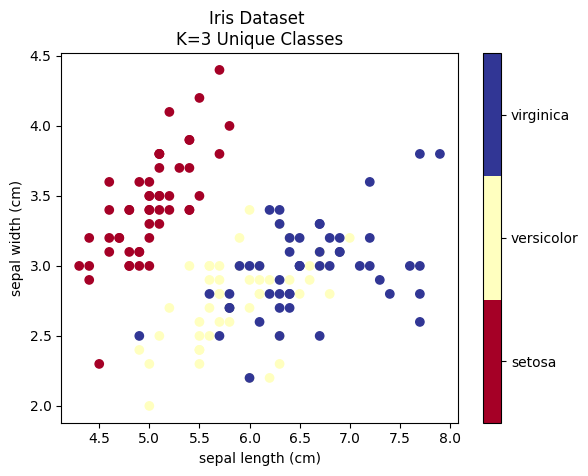

In [4]:
# Visualize the Iris dataset
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, 0], iris.data[:, 1],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.title('Iris Dataset \nK=3 Unique Classes')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [5]:
# Train a LinearRegression Classifier
clf = KNN(k=3)
clf.fit(X_train, y_train)

## Making Predictions <a name="making-predictions"></a>

After "training" the model, we can make predictions on new, unseen data points by following the steps outlined in the Model Implementation section.

In [6]:
# Generate Predictions from the Fitted Model
predictions = clf.predict(X_test)

## Evaluation <a name="evaluation"></a>

To evaluate our KNN model's performance, we can use metrics such as accuracy (for classification) or mean squared error (for regression) on a separate validation or test dataset.

In [7]:
def accuracy(y_true, y_pred):
    """
    Helper function to determine accuracy from
    the trained model's predictions vs. actuals
    """
    return np.sum(y_true == y_pred) / len(y_true)

In [8]:
accuracy = accuracy(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

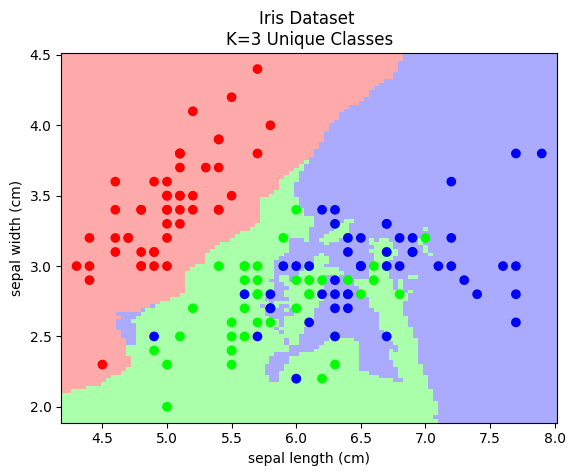

In [11]:
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

knn = KNN(k=3)
knn.fit(X[:, :2], y) # Visualize 2 Features only

x_min = X[:, 0].min() - .1
x_max = X[:, 0].max() + .1
y_min = X[:, 1].min() - .1
y_max = X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.title('Iris Dataset \nK=3 Unique Classes')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')


## Conclusion

In this notebook, we've implemented the k-Nearest Neighbors (KNN) algorithm from scratch. We've covered the fundamental steps of data preparation, model implementation, prediction, and evaluation. KNN is a versatile algorithm used for classification and regression tasks. By understanding its inner workings, you'll have a solid foundation for further exploring machine learning algorithms and their applications.